In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('../data/titanic_train.csv')
df_test = pd.read_csv('../data/titanic_test.csv')
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [4]:
print(df_train.info())
print('--------------------------------')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pcla

In [5]:
'''불필요한 피처 제거'''
df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis = 1)
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis =1)

<Axes: >

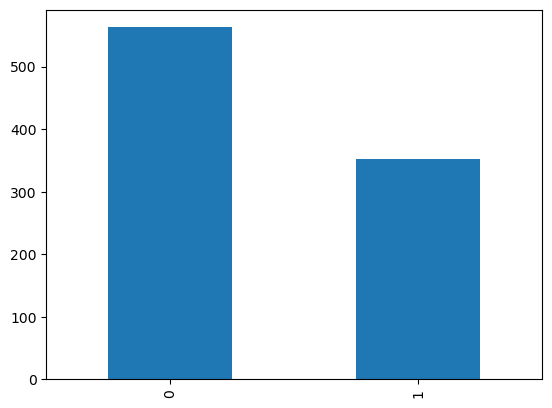

In [6]:
df_train['survived'].value_counts()
df_train['survived'].value_counts().plot.bar()

In [7]:
'''생존자별 클래스 알아보기'''
print(df_train['pclass'].value_counts())

3    498
1    230
2    188
Name: pclass, dtype: int64


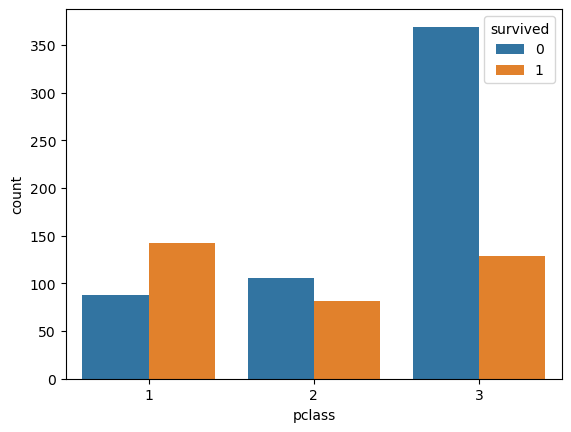

In [8]:
ax = sns.countplot(x='pclass', hue ='survived', data = df_train)

In [29]:
from scipy import stats

In [9]:
'''두 피처를 비교하면서 자동으로 탐색하게 하는 함수 만들기'''
def valid_features(df,col_name, distribution_check=True):
    
    '''sruvived 1 과 0 의 분포 그래프'''
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    # 두 집단 (survived=1, survived=0)의 표준편차를 각각 출력합니다.
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
   # 두 그룹 간의 평균 차이를 검정하는 T-test를 수행.
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])

    # 등분산을 가정하지 않고 T-test를 수행.
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)

     # 등분산 가정 시의 T-test 결과를 출력.
    print("등분산 가정 시 t-통계량과 p-value는 %.3f and %.3f입니다." % tTestResult)

    # 등분산을 가정하지 않을 때의 T-test 결과를 출력.
    print("등분산 가정 없을 때 t-통계량과 p-value는 %.3f and %.3f입니다." % tTestResultDiffVar)
    
    if distribution_check:
    # distribution_check가 True인 경우에만 실행
    # Shapiro-Wilk 검정을 통해 분포의 정규성 정도를 검증.

    # 생존자 그룹의 데이터에 대한 Shapiro-Wilk 검정 결과 출력
           print("생존자 그룹의 데이터 정규성 검정 결과 (W-통계량과 p-값)는 %.3f and %.3f입니다." % stats.shapiro(titanic_survived[col_name]))

    # 비생존자 그룹의 데이터에 대한 Shapiro-Wilk 검정 결과 출력
           print("비생존자 그룹의 데이터 정규성 검정 결과 (W-통계량과 p-값)는 %.3f and %.3f입니다." % stats.shapiro(titanic_n_survived[col_name]))

data std is 14.22
data std is 13.71


NameError: name 'stats' is not defined

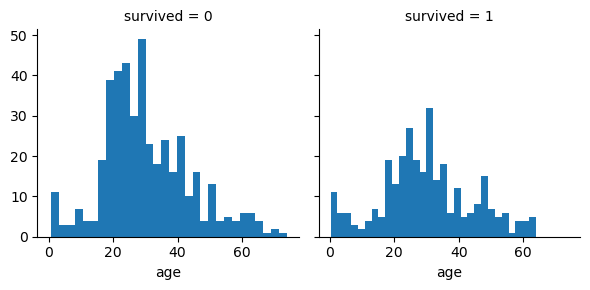

In [10]:
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)
'''종합하면, 두 그룹 간의 평균 차이는 통계적으로 유의미하지 않으며, 
데이터의 정규성 가정은 만족하지 않는 것으로 나타남.'''

In [ ]:
'''생존자 분류 모델 만들기'''

In [14]:
#age의 결측값을 평균값으로 대체
replace_mean = df_train[df_train['age']>0]['age'].mean()# 조건에 맞으면 평균값 계산
df_train['age']=df_train['age'].fillna(replace_mean)
df_test['age']=df_test['age'].fillna(replace_mean)

# 스트링 데이터인 embark 컬럼의 결측값을 최빈값으로 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked']= df_test['embarked'].fillna(embarked_mode)

# 범주형 데이터 변수를 One-hot 인코딩 할 때는 모든 고유값 고려해야 
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# one-hot encoding
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[train_idx_num:]

df_train.head()


,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


In [17]:
'''데이터 셋 x,y 분리'''
x_train, y_train = df_train.loc[:, 
                df_train.columns !='survived'].values,df_train['survived'].values
x_test, y_test = df_test.loc[:, 
               df_test.columns !='survived'].values, df_test['survived'].values


In [24]:
'''분류모델링'''
# Logfistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [31]:
'''Logistic Regression learning'''
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
lr.fit(x_test, y_test)

LogisticRegression(random_state=0)

In [33]:

'''예측결과 반환'''
y_pred = lr.predict(x_test)

# 테스트 데이터셋에 대한 accuracy, precision, recall, f1 평가 지표를 각각 출력합니다.
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.80
Precision : 0.773
Recall : 0.673
F1 : 0.720


In [ ]:
'''
Accuracy (정확도): 80%
정밀도는 Positive즉 77.3%입니다.
Recall (재현율 또는 민감도):
67.3%입니다.
F1 Score (F1 점수):
72.0%입니다.'''

In [36]:
'''모델 성능 평가를 위한 혼동 행렬 계산'''
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)


[[217  29]
 [ 48  99]]


In [ ]:
'''성능 평가 해석
TN (True Negative): 217
FP (False Positive): 29
FN (False Negative): 48
TP (True Positive): 99
해석:

모델은 217개의 샘플을 실제로 Negative로 정확하게 예측됨.
29개의 샘플은 모델이 Negative로 예측했지만, 실제로는 Positive
48개의 샘플은 모델이 Positive로 예측했지만, 실제로는 Negative
99개의 샘플은 모델이 실제로 Positive로 정확하게 예측


In [ ]:
'''AUC : 면적이 1에 가까울수록 모델의 성능이 좋다고 판단'''

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
'''predict_proba 메서드는 각 클래스에 대한 예측 확률을 반환하며, 
[:, 1]은 두 번째 열(클래스 1에 대한 확률)만 선택하는 부분입니다.
이 예측 확률은 일반적으로 모델의 확신 정도를 나타냅니다.'''

y_pred_probability = lr.predict_proba(x_test)[:,1]

In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

AUC : 0.844


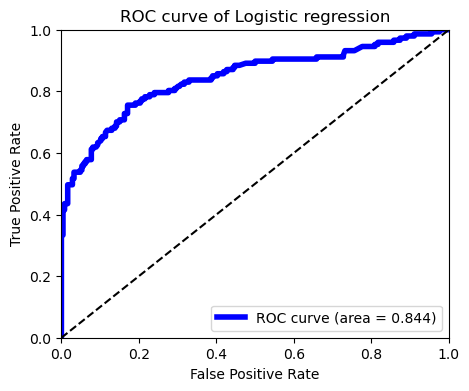

In [42]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='blue', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")